In [28]:
import numpy as np                  # Mathetimatical Operations
import pandas as pd                 # Data manipulation

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt     
%matplotlib inline

# Sklearn
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, auc, classification_report, mean_squared_error, confusion_matrix, f1_score, precision_recall_curve, r2_score 
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor

# Scipy
from scipy.stats import stats
from scipy.stats import ttest_ind, ttest_ind_from_stats

# XGBoost
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import xgboost as xgb

# Bayesian Optimizer
from skopt import BayesSearchCV

# Datetime
import datetime 
import time
from datetime import datetime

# Folium
import folium 
from folium import plugins
from folium.plugins import HeatMap

# Image
from IPython.display import Image

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

### Question 1.

- Programmatically download and load into your favorite analytical tool the trip data for September 2015.


In [2]:
df = pd.read_csv('green_tripdata_2015-09.csv')

In [3]:
# Making a copy which will be used in visualization

train = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494926 entries, 0 to 1494925
Data columns (total 21 columns):
VendorID                 1494926 non-null int64
lpep_pickup_datetime     1494926 non-null object
Lpep_dropoff_datetime    1494926 non-null object
Store_and_fwd_flag       1494926 non-null object
RateCodeID               1494926 non-null int64
Pickup_longitude         1494926 non-null float64
Pickup_latitude          1494926 non-null float64
Dropoff_longitude        1494926 non-null float64
Dropoff_latitude         1494926 non-null float64
Passenger_count          1494926 non-null int64
Trip_distance            1494926 non-null float64
Fare_amount              1494926 non-null float64
Extra                    1494926 non-null float64
MTA_tax                  1494926 non-null float64
Tip_amount               1494926 non-null float64
Tolls_amount             1494926 non-null float64
Ehail_fee                0 non-null float64
improvement_surcharge    1494926 non-null float64
To

In [5]:
df.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,0.0,1.494926e+06,1.494926e+06,1.494926e+06,1.494922e+06
mean,1.782045e+00,1.097653e+00,-7.383084e+01,4.069114e+01,-7.383728e+01,4.069291e+01,1.370598e+00,2.968141e+00,1.254320e+01,3.512800e-01,4.866408e-01,1.235727e+00,1.231047e-01,NaN,2.920991e-01,1.503215e+01,1.540559e+00,1.022353e+00
std,4.128570e-01,6.359437e-01,2.776082e+00,1.530882e+00,2.677911e+00,1.476698e+00,1.039426e+00,3.076621e+00,1.008278e+01,3.663096e-01,8.504473e-02,2.431476e+00,8.910137e-01,NaN,5.074009e-02,1.155316e+01,5.232935e-01,1.478288e-01
min,1.000000e+00,1.000000e+00,-8.331908e+01,0.000000e+00,-8.342784e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.750000e+02,-1.000000e+00,-5.000000e-01,-5.000000e+01,-1.529000e+01,NaN,-3.000000e-01,-4.750000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395961e+01,4.069895e+01,-7.396782e+01,4.069878e+01,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.160000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394536e+01,4.074674e+01,-7.394504e+01,4.074728e+01,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391748e+01,4.080255e+01,-7.391013e+01,4.079015e+01,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.317726e+01,0.000000e+00,4.279934e+01,9.000000e+00,6.031000e+02,5.805000e+02,1.200000e+01,5.000000e-01,3.000000e+02,9.575000e+01,NaN,3.000000e-01,5.813000e+02,5.000000e+00,2.000000e+00


#### Observation

1. Variable Ehail_Fee does not have a single value in it

2. There are four missing values in Trip_type

3. There are negative values in Fare amount, Tip amount, Improvement surcharge, MTA tax and Total amount

4. Total amount has to be greater than 2.5 dollar for all rides in NYC

In [6]:
# Since Ehail_fee doesnt contain any values, I will drop it
df = df.drop(['Ehail_fee'],axis=1)

In [7]:
# Consider only the positive values
df = df[df['Fare_amount']>0]
df = df[df['Extra']>0]
df = df[df['Total_amount']> 2.5]

In [8]:
df = df.dropna()

In [9]:
df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,0.59,4.0,0.5,0.5,0.50,0.0,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,0.74,5.0,0.5,0.5,0.00,0.0,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,0.61,5.0,0.5,0.5,0.00,0.0,0.3,6.30,2,1.0
5,2,2015-09-01 00:00:39,2015-09-01 00:05:20,N,1,-73.945297,40.808186,-73.937668,40.821198,1,1.07,5.5,0.5,0.5,1.36,0.0,0.3,8.16,1,1.0
6,2,2015-09-01 00:00:52,2015-09-01 00:05:50,N,1,-73.890877,40.746426,-73.876923,40.756306,1,1.43,6.5,0.5,0.5,0.00,0.0,0.3,7.80,1,1.0


In [10]:
# Convert the columns to datetime format which is easy for pandas to read

df['lpep_pickup_datetime'] = pd.to_datetime(df.lpep_pickup_datetime)
df['Lpep_dropoff_datetime'] = pd.to_datetime(df.Lpep_dropoff_datetime)

In [11]:
# Extract year, month, day, hour, minute, second
df['hour'] = df.lpep_pickup_datetime.dt.hour
df['minute'] = df.lpep_pickup_datetime.dt.minute
df['second'] = df.lpep_pickup_datetime.dt.second
df['year'] = df.lpep_pickup_datetime.dt.year
df['month'] = df.lpep_pickup_datetime.dt.month
df['day'] = df.lpep_pickup_datetime.dt.day
df['dayofweek'] = df.lpep_pickup_datetime.dt.dayofweek

### Question 2

- Plot a histogram of the number of the trip distance (“Trip Distance”) and Report any structure you find and any hypotheses you have about that structure.

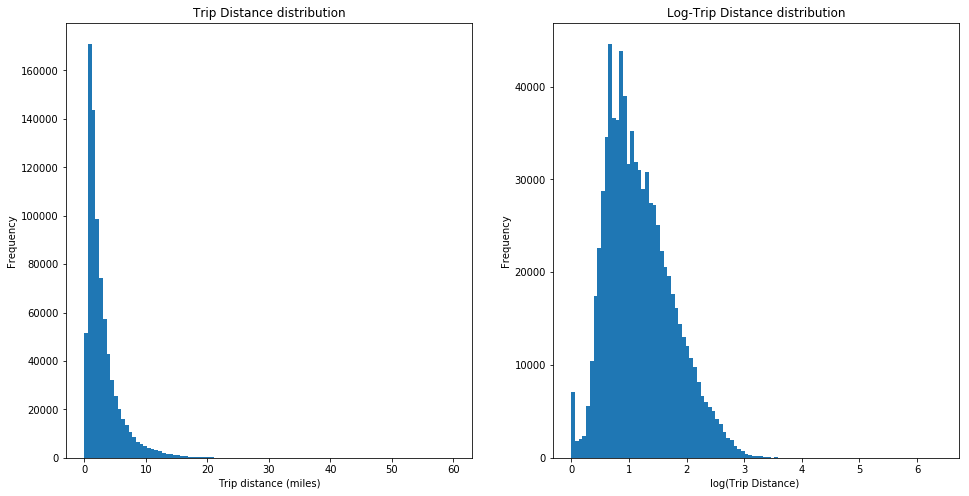

In [12]:
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 8), sharex=False)

ax0.set_title('Trip Distance distribution')
ax0.set_xlabel('Trip distance (miles)')
ax0.set_ylabel('Frequency')

ax1.set_title('Log-Trip Distance distribution')
ax1.set_xlabel('log(Trip Distance) ')
ax1.set_ylabel('Frequency')

ax0.hist(df['Trip_distance'], bins=100, range=(0,60));
ax1.hist(np.log1p(df['Trip_distance']), bins=100);

#### Structure: 
The Trip Distance is highly skewed to the right and it has a median smaller than its mean and both smaller than the standard deviation. 
#### Observation: 
Most of the people use the green taxi's are for shorter distances

### Question 3

#### Part a

- Report mean and median trip distance grouped by hour of day.

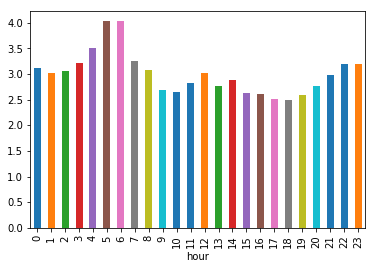

In [13]:
df.Trip_distance.groupby(df.hour).mean().plot.bar()

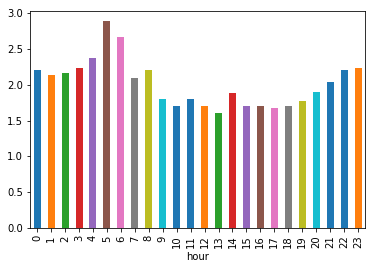

In [14]:
df.Trip_distance.groupby(df.hour).median().plot.bar()

#### Observation:
The highest trip distances occur between 5 AM and 6 AM. One inference we can draw from this is that these trips can be airport trips which usually require for trip distances to be longer. Airports are usually located outside the city and hence would require higher trip distances. During the day, trip distances are shorter as people would generally take cabs to move from one place to other which is not that far. 

#### Part b

- We’d like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fare, and any other interesting characteristics of these trips.

In [15]:
# RateCode ID contains the final rate code in effect at the end of the trip which we can use to solve this part. 
# All the trip ending at JFK airport will be considered 

airport_trips = df[df['VendorID']==2]
print("Number of trips to JFK airport: ", airport_trips.shape[0])
print("Average fare (calculated by the meter) of trips to JFK airport: $", airport_trips.Fare_amount.mean(),"per trip")
print("Average total charged amount (before tip) of trips to JFK airport: $", airport_trips.Total_amount.mean(),"per trip")

Number of trips to JFK airport:  637421
Average fare (calculated by the meter) of trips to JFK airport: $ 12.070982521755637 per trip
Average total charged amount (before tip) of trips to JFK airport: $ 14.837684764050342 per trip


### Question 4

#### Part a

- Build a derived variable for tip as a percentage of the total fare.

In [16]:
df['perc_tip'] = (df['Tip_amount']/df['Total_amount'])*100

#### Part b

- Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). Provide an estimate of performance using an appropriate sample, and show your work

In [17]:
# While predicting tip as a percentage of total fare, features like vendor_id, store_and_fwd_flag are not useful.
# Hence I will drop them

df_new = df.drop(['VendorID','lpep_pickup_datetime', 'Trip_distance', 'Lpep_dropoff_datetime', 
                  'Fare_amount', 'Store_and_fwd_flag', 'Tip_amount', 'year', 'month'],axis=1)

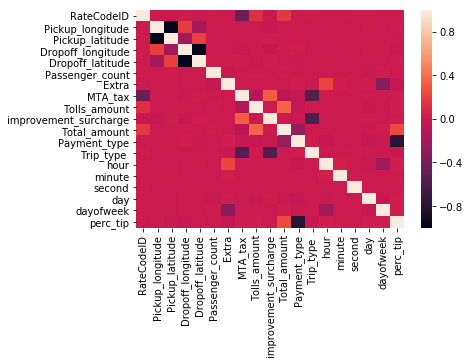

In [18]:
# Check the correlation between the features
sns.heatmap(df_new.corr())

#### Observation:

Most of the features are uncorrelated or even if they are correlated, the value is low

In [19]:
df_new.describe()

,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Extra,MTA_tax,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,hour,minute,second,day,dayofweek,perc_tip
count,809137.000000,809137.000000,809137.000000,809137.000000,809137.000000,809137.000000,809137.000000,809137.000000,809137.000000,809137.000000,809137.000000,809137.000000,809137.000000,809137.000000,809137.000000,809137.000000,809137.000000,809137.000000,809137.000000
mean,1.003098,-73.876847,40.710319,-73.857330,40.698431,1.397752,0.650005,0.499570,0.093344,0.299742,14.831892,1.528289,1.000298,14.659574,29.109349,29.518954,15.474425,3.119069,6.856229
std,0.090187,2.072515,1.143083,2.367273,1.305385,1.073449,0.229473,0.014658,0.780619,0.008789,10.011971,0.517654,0.017256,8.398193,17.307435,17.317741,8.538456,1.911294,8.901619
min,1.000000,-83.277878,0.000000,-83.277832,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,2.550000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,-73.960052,40.698444,-73.965500,40.694115,1.000000,0.500000,0.500000,0.000000,0.300000,8.300000,1.000000,1.000000,4.000000,14.000000,15.000000,8.000000,2.000000,0.000000
50%,1.000000,-73.946640,40.737968,-73.943825,40.739464,1.000000,0.500000,0.500000,0.000000,0.300000,11.800000,2.000000,1.000000,18.000000,29.000000,30.000000,16.000000,3.000000,0.000000
75%,1.000000,-73.916710,40.790371,-73.908737,40.776428,1.000000,1.000000,0.500000,0.000000,0.300000,17.800000,2.000000,1.000000,21.000000,44.000000,45.000000,23.000000,5.000000,16.666667
max,4.000000,0.000000,42.460007,0.000000,42.460091,6.000000,12.000000,0.500000,95.750000,0.300000,460.800000,5.000000,2.000000,23.000000,59.000000,59.000000,30.000000,6.000000,97.213221


In [20]:
# Lets onehot encode the features
df_new = pd.get_dummies(df_new, columns=['Payment_type','RateCodeID', 'Trip_type '])

In [21]:
# Splitting the dataset
X = df_new.drop(['perc_tip'],axis=1)
y = df_new['perc_tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### I will be trying different Bagging and Boosting algorithms to check which one is performing the best and then check which features are highly important in determining the percentage tip

In [43]:
ab = AdaBoostRegressor(random_state=4747)
bg = BaggingRegressor(max_features=0.33, n_jobs=-1, random_state=4747)
gbr = GradientBoostingRegressor(random_state=4747)
rf = RandomForestRegressor(random_state=4747)

In [44]:
ab.fit(X_train, y_train)
bg.fit(X_train, y_train)
gbr.fit(X_train, y_train)
rf.fit(X_train, y_train)

pred_ab = ab.predict(X_test)
pred_bg = bg.predict(X_test)
pred_gbr=gbr.predict(X_test)
preds_rf=rf.predict(X_test)

print('AdaBoost Regression')
print("r2: {:.4f}".format(r2_score(y_test, pred_ab) ) )
print("mse: {:.4f}".format(mean_squared_error(y_test, pred_ab) ) )

print('Bagging Regression')
print("r2: {:.4f}".format(r2_score(y_test, pred_bg) ) )
print("mse: {:.4f}".format(mean_squared_error(y_test, pred_bg) ) )

print('GradientBoosting Regression')
print("r2: {:.4f}".format(r2_score(y_test, pred_gbr) ) )
print("mse: {:.4f}".format(mean_squared_error(y_test, pred_gbr) ) )

print('Random Forest Regression')
print("r2: {:.4f}".format(r2_score(y_test, pred_rf) ) )
print("mse: {:.4f}".format(mean_squared_error(y_test, pred_rf) ) )

AdaBoost Regression
r2: 0.2710
mse: 57.4242
Bagging Regression
r2: 0.6877
mse: 24.5973
GradientBoosting Regression
r2: 0.6921
mse: 24.2495
Random Forest Regression
r2: 0.7756
mse: 17.6781


#### Observation: Random Forest performed the best

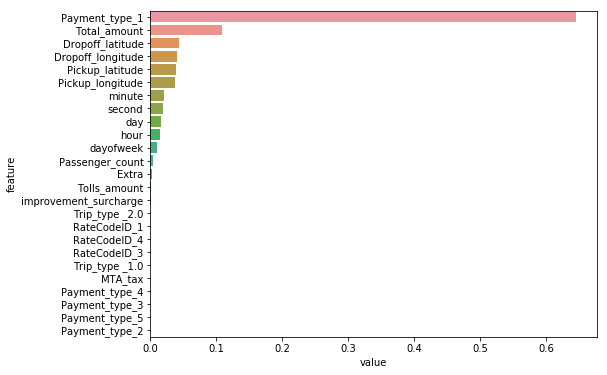

In [49]:
importance = pd.DataFrame({'value': rf.feature_importances_,
                           'feature': np.array(X_train.columns)})
importance.sort_values(by='value', ascending=False, inplace=True)
plt.figure(figsize=(8,6))
sns.barplot(x='value', y='feature', data=importance);

#### Observation:

As we can see from the feature importance, credit card payments account for the highest contribution in tips

### Question 5.  

#### Part a
- Build a derived variable representing the average speed over the course of a trip.

In [51]:
df['trip_duration'] = pd.to_timedelta(df['Lpep_dropoff_datetime'] - df['lpep_pickup_datetime'])
df['trip_duration'] = df['trip_duration'].astype(('timedelta64[s]'))
df['Speed'] = df.Trip_distance/(df.trip_duration/3600)

In [52]:
df.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,...,hour,minute,second,year,month,day,dayofweek,perc_tip,trip_duration,Speed
count,809137.000000,809137.000000,809137.000000,809137.000000,809137.000000,809137.000000,809137.000000,809137.000000,809137.000000,809137.000000,...,809137.000000,809137.000000,809137.000000,809137.0,809137.0,809137.000000,809137.000000,809137.000000,809137.000000,8.087630e+05
mean,1.787779,1.003098,-73.876847,40.710319,-73.857330,40.698431,1.397752,2.933335,12.058135,0.650005,...,14.659574,29.109349,29.518954,2015.0,9.0,15.474425,3.119069,6.856229,1206.608415,inf
std,0.408881,0.090187,2.072515,1.143083,2.367273,1.305385,1.073449,2.937463,8.644130,0.229473,...,8.398193,17.307435,17.317741,0.0,0.0,8.538456,1.911294,8.901619,6091.121020,NaN
min,1.000000,1.000000,-83.277878,0.000000,-83.277832,0.000000,0.000000,0.000000,1.250000,0.250000,...,0.000000,0.000000,0.000000,2015.0,9.0,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2.000000,1.000000,-73.960052,40.698444,-73.965500,40.694115,1.000000,1.100000,6.500000,0.500000,...,4.000000,14.000000,15.000000,2015.0,9.0,8.000000,2.000000,0.000000,367.000000,9.831325e+00
50%,2.000000,1.000000,-73.946640,40.737968,-73.943825,40.739464,1.000000,2.000000,9.500000,0.500000,...,18.000000,29.000000,30.000000,2015.0,9.0,16.000000,3.000000,0.000000,608.000000,1.226576e+01
75%,2.000000,1.000000,-73.916710,40.790371,-73.908737,40.776428,1.000000,3.700000,15.000000,1.000000,...,21.000000,44.000000,45.000000,2015.0,9.0,23.000000,5.000000,16.666667,985.000000,1.548741e+01
max,2.000000,4.000000,0.000000,42.460007,0.000000,42.460091,6.000000,603.100000,459.000000,12.000000,...,23.000000,59.000000,59.000000,2015.0,9.0,30.000000,6.000000,97.213221,86394.000000,inf


In [53]:
# We can see that mean speed is infinite and minimum speed is 0 which means both trip duration and trip distance 
# is 0 for some values. Lets remove them

df = df[(df[['Trip_distance']] != 0).all(axis=1)]
df = df[(df[['trip_duration']] != 0).all(axis=1)]

In [54]:
# There are some values for which the speed is more than 150 mph, which are redundant, so I am going to take the values
# only where speeds are less than 150 mph

df = df.drop(df[df.Speed > 150].index)

In [55]:
df['week_number'] = df['lpep_pickup_datetime'].dt.week

In [56]:
df_speed = df.groupby(['hour']).mean()

<BarContainer object of 24 artists>

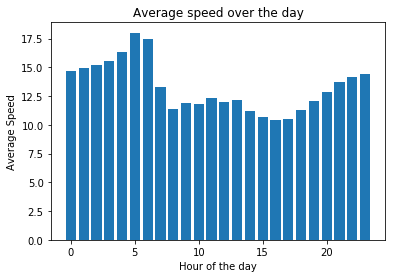

In [57]:
plt.title('Average speed over the day')
plt.xlabel('Hour of the day')
plt.ylabel('Average Speed')
plt.bar(df_speed.index,df_speed.Speed)

The above bar chart shows hourly average speed of the green taxi in the month of September. 

From the bar chart we observe following things

1. Average Speed for the Green Taxi is highest at 5 AM (around 17.5 miles per hour)

2. Average Speed for the Green Taxi is lowest at 4 PM (around 10 miles per hour)

3. In afternoon the average speed is low however it consistently increases post 6 PM


<BarContainer object of 5 artists>

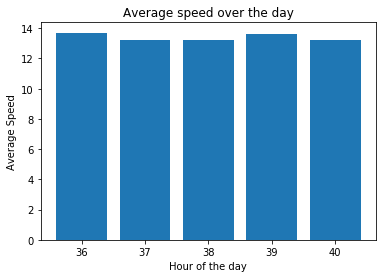

In [58]:
df_week = df.groupby(['week_number']).mean()
plt.title('Average speed over the day')
plt.xlabel('Hour of the day')
plt.ylabel('Average Speed')
plt.bar(df_week.index,df_week.Speed)

The above bar chart shows weekly average speed of the green taxi in the month of September. From the bar chart we observe following things

1. Average Speed for the Green Taxis is highest in week number 36 i.e in the last week of September
2. Average Speed for the Green Taxi is lowest in week number 38

#### Part b

- Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September? If you decide they are not the same, can you form a hypothesis regarding why they differ?

I would perform a student t test to check if average speed is constant over all the weeks or not

In [59]:
# calculate t-test
weeks = pd.unique(df.week_number)
pvals = []
for i in range(len(weeks)): # for each pair, run t-test
    for j in range(len(weeks)):
        pvals.append((weeks[i], weeks[j],ttest_ind(df[df.week_number==weeks[i]].Speed,df[df.week_number==weeks[j]].Speed)[1]))
    
pvalues = pd.DataFrame(pvals,columns=['w1','w2','pval'])
print ("p-values:\n", pvalues.pivot_table(index='w1',columns='w2',values='pval').T)


p-values:
 w1             36             37             38             39            40
w2                                                                          
36   1.000000e+00  2.370259e-132  1.291468e-138   5.288248e-04  1.945009e-85
37  2.370259e-132   1.000000e+00   9.215711e-01  1.135320e-103  3.494561e-01
38  1.291468e-138   9.215711e-01   1.000000e+00  2.617753e-108  2.987369e-01
39   5.288248e-04  1.135320e-103  2.617753e-108   1.000000e+00  3.587638e-66
40   1.945009e-85   3.494561e-01   2.987369e-01   3.587638e-66  1.000000e+00


In [60]:
week_1 = df['Speed'][df['week_number']==36].as_matrix()
week_2 = df['Speed'][df['week_number']==37].as_matrix()
week_3 = df['Speed'][df['week_number']==38].as_matrix()
week_4 = df['Speed'][df['week_number']==39].as_matrix()
week_5 = df['Speed'][df['week_number']==40].as_matrix()

In [61]:
stats.f_oneway(week_1,week_2, week_3,week_4, week_5)

F_onewayResult(statistic=302.06531365755114, pvalue=4.053866216156916e-260)

- Null Hypothesis:       Mean is same for different weeks

- Alternate hypothesis:  Mean is different for different weeks

From the student t-test and One Way ANOVA, p values are significant and therefore we reject the null hypothesis and average trip speeds are materially the different in all weeks of September.

### Question 6

- Can you build a visualization (interactive or static) of the trip data that helps us understand intra- vs. inter-borough traffic? What story does it tell about how New Yorkers use their green taxis?

Before diving into the visualization part, lets find out how many boroughs are there in NYC. 

NYC city has 5 boroughs: 

   1. Manhattan
   2. Brooklyn
   3. Staten Island
   4. Queens
   5. Bronx

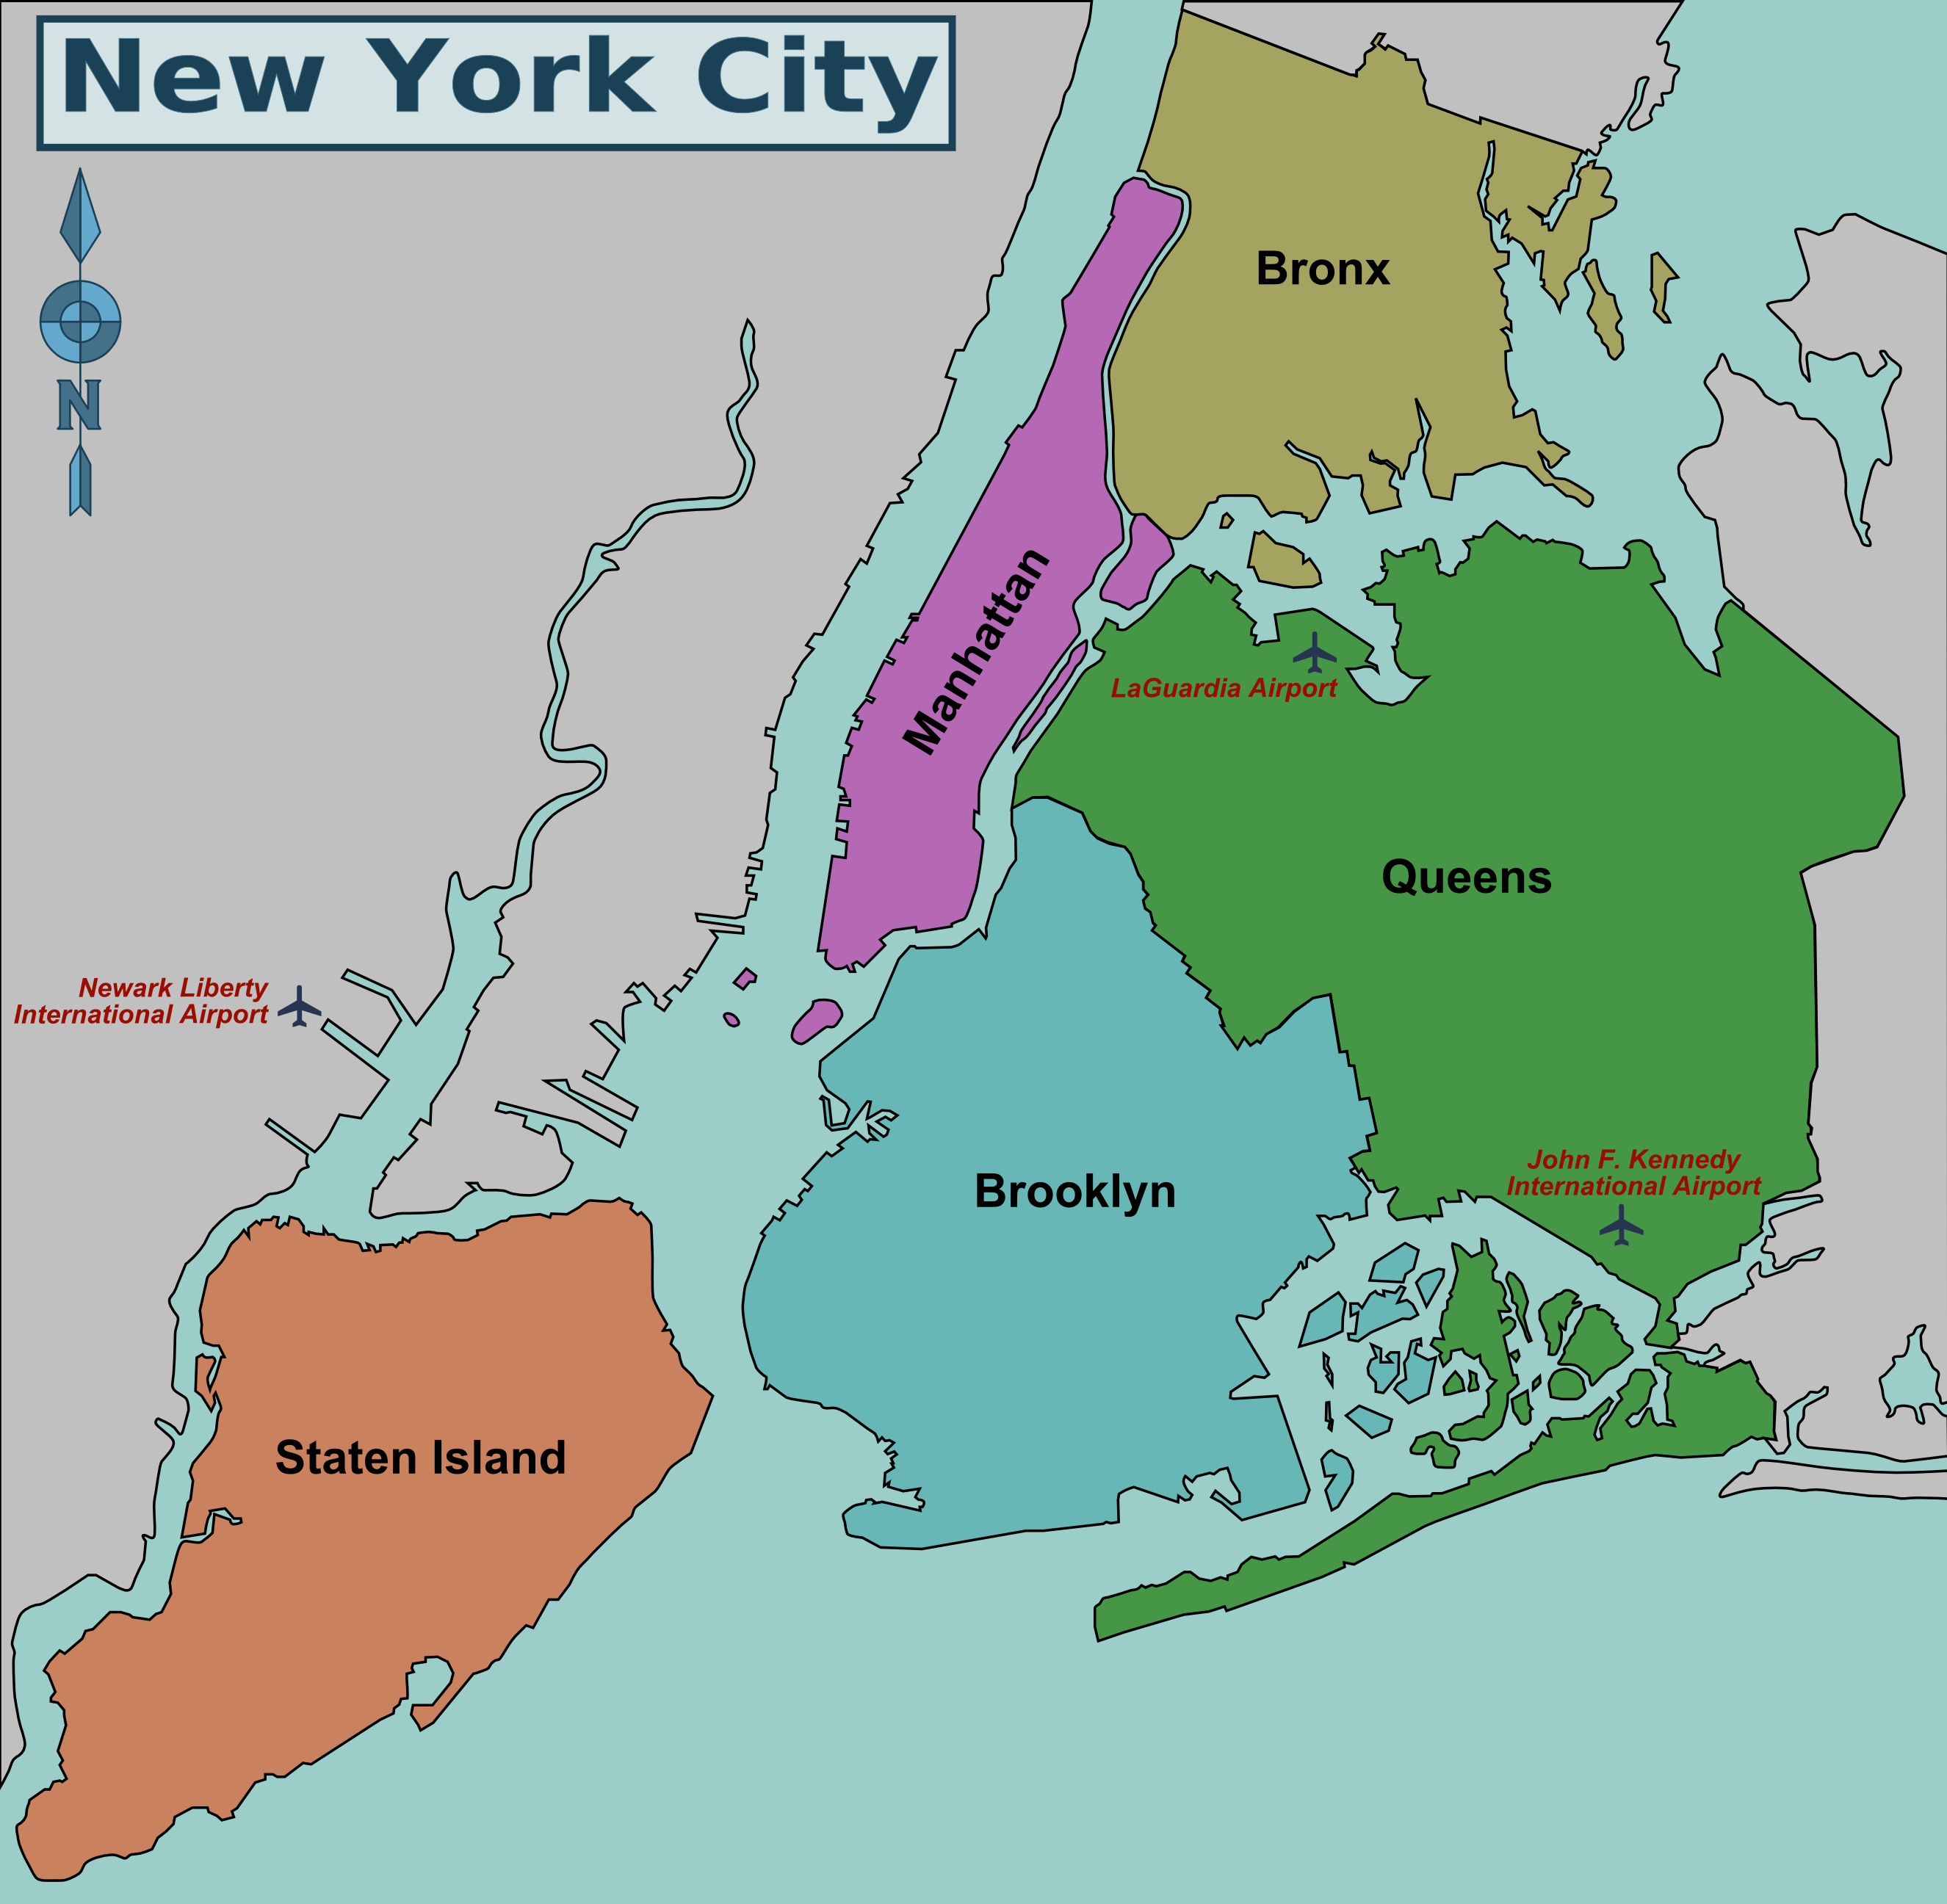

In [62]:
Image("nyc-borough-map.png", width = 500, height= 500)

First things first! Set theme! Let's plot New York city where we are going to go with the help of our pickup and dropoff coordinates.

We will plot monthwise (timeseries) drop off locations using HeatMap.

We will use Folium library for this, which is python wrapper for R package Leaflet .

There are some latitude and longitude co-ordinates which are way far from New York city. Let's filtered them out.

In [63]:
west, south, east, north = -74.03, 40.63, -73.77, 40.85

train = train[(train.Pickup_latitude> south) & (train.Pickup_latitude < north)]
train = train[(train.Dropoff_latitude> south) & (train.Dropoff_latitude < north)]
train = train[(train.Pickup_longitude> west) & (train.Pickup_longitude < east)]
train = train[(train.Dropoff_longitude> west) & (train.Dropoff_longitude < east)]

In [64]:
train.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
5,2,2015-09-01 00:00:39,2015-09-01 00:05:20,N,1,-73.945297,40.808186,-73.937668,40.821198,1,...,5.5,0.5,0.5,1.36,0.0,NaN,0.3,8.16,1,1.0


#### Pickups and Dropoff locations

- Let's now separately look at pickups and dropoffs to understand the movement pattern

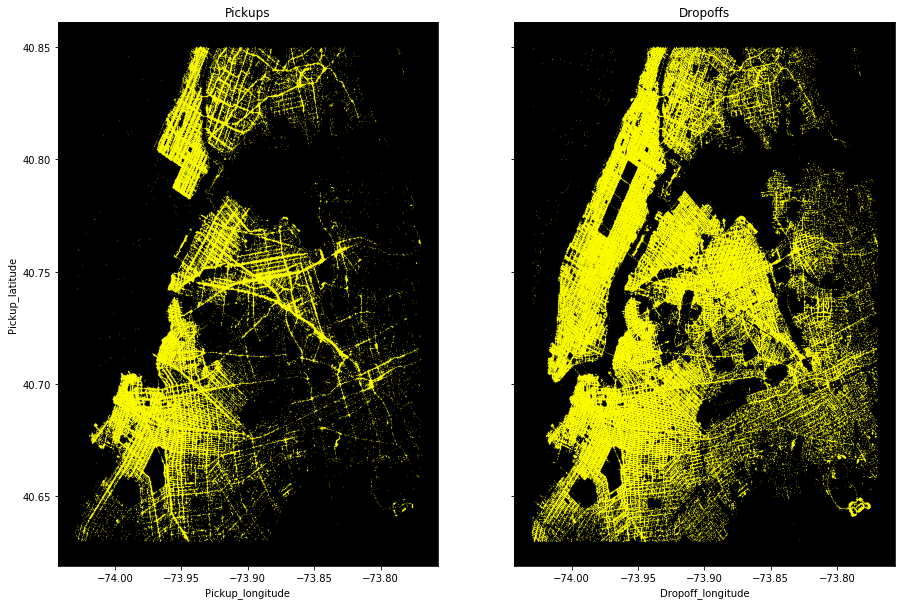

In [67]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,10))

train.plot(kind='scatter', x='Pickup_longitude', y='Pickup_latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Pickups")
ax1.set_facecolor('black')

train.plot(kind='scatter', x='Dropoff_longitude', y='Dropoff_latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Dropoffs")
ax2.set_facecolor('black') 

As we can see in the above map ,

- Pickups are from 3 boroughs i.e Bronx, Queens and Brooklyn
- Green taxi is not allowed pickups from Manhattan
- Dropoff's are allowed in Manhattan
- Other locations where I can see traffic(bright lights in map) is at 2 airports, John F. Kennedy and LA Guardia Airport in Queens.
- Dropoffs are scattered all over New York city. May be people taking cabs to their homes.

#### Trips from LA Guardia Airport Animation

Let's View another cool animation of pickup and dropoffs of trips using Folium Timestamped GeoJSON plugin. We have filtered to and fro trips from LA Guardia International Airport.

In [536]:
train['lpep_pickup_datetime'] = pd.to_datetime(train.lpep_pickup_datetime)
train['Lpep_dropoff_datetime'] = pd.to_datetime(train.Lpep_dropoff_datetime)
train['trip_duration'] = pd.to_timedelta(train['Lpep_dropoff_datetime'] - train['lpep_pickup_datetime'])
train['trip_duration'] = train['trip_duration'].astype(('timedelta64[s]'))
#co-ordinates
LaGuardia = {
    "minLat": 40.76,
    "maxLat": 40.78,
    "minLong": -73.895,
    "maxLong": -73.855
}
train['Pickup_datetime'] = pd.to_datetime(train.lpep_pickup_datetime)
train['Dropoff_datetime'] = pd.to_datetime(train.Lpep_dropoff_datetime)

LaGuardiaData = train[(train['Pickup_longitude'].apply(lambda x: (x >=LaGuardia["minLong"]) & (x <= LaGuardia["maxLong"])))]
LaGuardiaData = train[(train['Pickup_latitude'].apply(lambda x: (x >=LaGuardia["minLat"]) & (x <= LaGuardia["maxLat"])))]
LaGuardiaData = train[(train['Dropoff_longitude'].apply(lambda x: (x >=LaGuardia["minLong"]) & (x <= LaGuardia["maxLong"])))]
LaGuardiaData = train[(train['Dropoff_latitude'].apply(lambda x: (x >=LaGuardia["minLat"]) & (x <= LaGuardia["maxLat"])))]

m = folium.Map(
    location=[40.7769, -73.8740],
    zoom_start=12
)
folium.Marker(location=[40.7769, -73.8740],icon=folium.Icon(color='black') ,popup='LA Guardia International Airport').add_to(m)

shortTripsDF=LaGuardiaData[LaGuardiaData.trip_duration==900]

lines = [
    {
        'coordinates': [
            [shortTripsDF.Pickup_longitude.iloc[index], shortTripsDF.Pickup_latitude.iloc[index]],
            [shortTripsDF.Dropoff_longitude.iloc[index], shortTripsDF.Dropoff_latitude.iloc[index]],
        ],
        'dates': [
        str(shortTripsDF.Pickup_datetime.iloc[index]),
        str(shortTripsDF.Dropoff_datetime.iloc[index])
        ],
        'color': 'gold'
    }
    for index in range(100)
]
features = [
    {
        'type': 'Feature',
        'geometry': {
            'type': 'LineString',
            'coordinates': line['coordinates'],
        },
        'properties': {
            'times': line['dates'],
            'style': {
                'color': line['color'],
                'weight': line['weight'] if 'weight' in line else 10
            }
        }
    }
    for line in lines
]


plugins.TimestampedGeoJson({
    'type': 'FeatureCollection',
    'features': features,
}, period='PT24H', add_last_point=True).add_to(m)
m

#### If you look at above map,

- Yellow lines mark the trip distance.
- Trip starts at pickup location , start of yellow color line and stops where the blue marker gets created.
- Black Marker denotes exact location of LA Guardia International Airport. If you click on black marker ,its location name popups.
- Most of the trips to airport are to or from Manhattan.